In [162]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torchvision
import math

In [163]:
input = torch.randn(1, 3, 32, 32)
input

tensor([[[[-0.4018,  0.5637,  1.5790,  ..., -1.4902,  0.9222,  2.0995],
          [ 1.2707,  0.1096,  0.6486,  ...,  0.5181,  0.8627,  0.6728],
          [ 0.3414,  1.0916, -0.4608,  ...,  1.2780,  0.1679, -0.1138],
          ...,
          [-0.0797, -0.4562, -1.0133,  ...,  0.7406, -0.9811,  0.9184],
          [ 1.8042, -0.8830,  1.1719,  ...,  1.6560,  1.4520,  0.8545],
          [ 0.6602,  1.2023, -1.6670,  ..., -0.3519, -0.8811, -0.5632]],

         [[ 1.1295,  0.9663,  0.3004,  ..., -1.1769,  0.7458,  0.0457],
          [ 0.9653,  0.3771, -0.2758,  ..., -1.3123, -1.6782,  0.2909],
          [ 0.8747, -0.6194,  0.1227,  ...,  0.5766,  1.0668,  0.6622],
          ...,
          [ 0.3901, -0.7039,  0.6520,  ...,  0.1376, -0.1533,  0.1997],
          [-0.5950, -0.4058,  0.6330,  ...,  0.5557, -0.1465,  0.1410],
          [-0.2641, -0.8966, -0.2098,  ...,  1.6261, -0.5720, -0.2824]],

         [[-0.8342,  2.2613, -0.3928,  ..., -0.3381, -0.2675, -0.0511],
          [ 1.0093, -1.1090, -

In [559]:
target = torch.randint(3, (1, 32, 32), dtype=torch.int64)
target

tensor([[[2, 2, 0,  ..., 0, 2, 2],
         [1, 1, 2,  ..., 0, 1, 2],
         [1, 2, 0,  ..., 2, 2, 0],
         ...,
         [2, 1, 2,  ..., 0, 1, 0],
         [1, 0, 2,  ..., 2, 1, 2],
         [1, 2, 1,  ..., 1, 0, 0]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


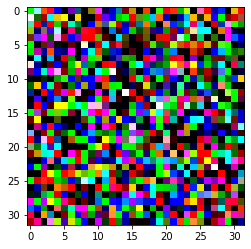

In [174]:
img=input[0]
img=img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

# 1.1

In [630]:
maxpool2d = torch.nn.MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, return_indices=False, ceil_mode=False)
torch_out = maxpool(input)
torch_out

tensor([[[[ 1.2707,  1.5790,  1.5790,  ...,  0.5181,  0.9222,  2.0995],
          [ 1.2707,  1.0916,  1.4697,  ...,  1.2780,  1.2780,  0.8627],
          [ 1.0916,  1.0916,  1.4697,  ...,  1.5892,  1.5892,  0.1679],
          ...,
          [ 1.4131,  0.7651,  1.0546,  ...,  1.9144,  1.9144,  1.8395],
          [ 1.8042,  1.1719,  1.1719,  ...,  1.6560,  1.6560,  1.4520],
          [ 1.8042,  1.2023,  1.4179,  ...,  1.6560,  1.6560,  1.4520]],

         [[ 1.1295,  0.9663,  1.2357,  ...,  1.3574,  0.7458,  0.7458],
          [ 0.9653,  0.3771,  1.2357,  ...,  1.3574,  1.0668,  1.0668],
          [ 0.8747,  0.4287,  0.4287,  ...,  0.5766,  1.0668,  1.0668],
          ...,
          [ 1.7545,  1.7545,  2.2944,  ...,  1.6848,  0.1376,  0.2979],
          [ 0.3901,  0.6520,  0.6520,  ...,  1.6848,  0.5557,  0.1997],
          [-0.2641,  0.6330,  0.6330,  ...,  1.6261,  1.6261,  0.1410]],

         [[ 2.2613,  2.2613,  1.3457,  ...,  1.9645, -0.0328,  0.2218],
          [ 1.0093,  0.5625,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


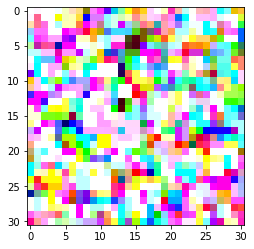

In [615]:
img=torch_out[0]
img=img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

In [631]:
class MyMaxPool2D(nn.Module):
    def __init__(self, kernel_size=(2, 2), stride=1):
        super(MyMaxPool2D, self).__init__()
        self.stride = stride
        self.kernel_size = kernel_size
        self.k_height = kernel_size[0]
        self.k_width = kernel_size[1]

    def forward(self, x):
        in_batch = x.size(0)
        in_channel = x.size(1)
        in_height = x.size(2)
        in_width = x.size(3)

        out_height = int((in_height - self.k_height) / self.stride) + 1
        out_width = int((in_width - self.k_width) / self.stride) + 1
        out = torch.zeros((in_batch, in_channel, out_height, out_width))

        for a in range(in_batch):
            for k in range(in_channel):
                for i in range(out_height):
                    for j in range(out_width):
                        start_i = i * self.stride
                        start_j = j * self.stride
                        end_i = start_i + self.k_height
                        end_j = start_j + self.k_width
                        out[a, k, i, j] = torch.max(x[a, k, start_i: end_i, start_j: end_j])
        return out

In [632]:
my_max = MyMaxPool2D()
my_out = my_max(input)
my_out

tensor([[[[ 1.2707,  1.5790,  1.5790,  ...,  0.5181,  0.9222,  2.0995],
          [ 1.2707,  1.0916,  1.4697,  ...,  1.2780,  1.2780,  0.8627],
          [ 1.0916,  1.0916,  1.4697,  ...,  1.5892,  1.5892,  0.1679],
          ...,
          [ 1.4131,  0.7651,  1.0546,  ...,  1.9144,  1.9144,  1.8395],
          [ 1.8042,  1.1719,  1.1719,  ...,  1.6560,  1.6560,  1.4520],
          [ 1.8042,  1.2023,  1.4179,  ...,  1.6560,  1.6560,  1.4520]],

         [[ 1.1295,  0.9663,  1.2357,  ...,  1.3574,  0.7458,  0.7458],
          [ 0.9653,  0.3771,  1.2357,  ...,  1.3574,  1.0668,  1.0668],
          [ 0.8747,  0.4287,  0.4287,  ...,  0.5766,  1.0668,  1.0668],
          ...,
          [ 1.7545,  1.7545,  2.2944,  ...,  1.6848,  0.1376,  0.2979],
          [ 0.3901,  0.6520,  0.6520,  ...,  1.6848,  0.5557,  0.1997],
          [-0.2641,  0.6330,  0.6330,  ...,  1.6261,  1.6261,  0.1410]],

         [[ 2.2613,  2.2613,  1.3457,  ...,  1.9645, -0.0328,  0.2218],
          [ 1.0093,  0.5625,  

In [633]:
torch.equal(my_out, torch_out)

True

# 1.2

In [634]:
averagepool = torch.nn.AvgPool2d(kernel_size=2, stride=1, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)
torch_out = averagepool(input)
torch_out

tensor([[[[ 3.8553e-01,  7.2522e-01,  6.4842e-01,  ..., -4.6114e-01,
            2.0321e-01,  1.1393e+00],
          [ 7.0331e-01,  3.4725e-01,  2.4955e-01,  ...,  2.8805e-01,
            7.0669e-01,  3.9742e-01],
          [ 1.9989e-01, -1.1299e-02,  4.4688e-01,  ...,  8.5229e-01,
            5.2824e-01, -3.5392e-01],
          ...,
          [ 1.7127e-01, -2.2412e-01, -8.1199e-02,  ...,  6.8343e-01,
            8.7836e-01,  5.2498e-01],
          [ 9.6325e-02, -2.9518e-01, -2.8635e-01,  ...,  7.2480e-01,
            7.1686e-01,  5.6095e-01],
          [ 6.9592e-01, -4.3979e-02,  1.8748e-01,  ...,  6.4810e-01,
            4.6873e-01,  2.1554e-01]],

         [[ 8.5958e-01,  3.4204e-01, -2.7124e-01,  ..., -2.4483e-01,
           -8.5541e-01, -1.4896e-01],
          [ 3.9942e-01, -9.8838e-02,  1.2567e-01,  ...,  2.0742e-01,
           -3.3680e-01,  8.5424e-02],
          [ 1.9219e-01, -8.9979e-02, -9.6886e-02,  ..., -1.6300e-01,
           -1.8692e-01,  1.8972e-01],
          ...,
     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


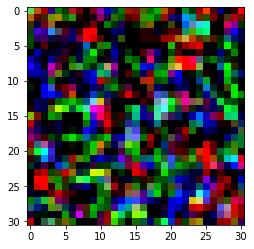

In [618]:
img=torch_out[0]
img=img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

In [635]:
class MyAveragePool2D(nn.Module):
    def __init__(self, kernel_size=(2, 2), stride=1):
        super(MyAveragePool2D, self).__init__()
        self.stride = stride
        self.kernel_size = kernel_size
        self.k_height = kernel_size[0]
        self.k_width = kernel_size[1]

    def forward(self, x):
        in_batch = x.size(0)
        in_channel = x.size(1)
        in_height = x.size(2)
        in_width = x.size(3)

        out_height = int((in_height - self.k_height) / self.stride) + 1
        out_width = int((in_width - self.k_width) / self.stride) + 1
        out = torch.zeros((in_batch, in_channel, out_height, out_width))

        for a in range(in_batch):
            for k in range(in_channel):
                for i in range(out_height):
                    for j in range(out_width):
                        start_i = i * self.stride
                        start_j = j * self.stride
                        end_i = start_i + self.k_height
                        end_j = start_j + self.k_width
                        out[a, k, i, j] = x[a, k, start_i: end_i, start_j: end_j].mean()
        return out

In [636]:
my_average = MyAveragePool2D()
my_out = my_average(input)
my_out

tensor([[[[ 3.8553e-01,  7.2522e-01,  6.4842e-01,  ..., -4.6114e-01,
            2.0321e-01,  1.1393e+00],
          [ 7.0331e-01,  3.4725e-01,  2.4955e-01,  ...,  2.8805e-01,
            7.0669e-01,  3.9742e-01],
          [ 1.9989e-01, -1.1299e-02,  4.4688e-01,  ...,  8.5229e-01,
            5.2824e-01, -3.5392e-01],
          ...,
          [ 1.7127e-01, -2.2412e-01, -8.1199e-02,  ...,  6.8343e-01,
            8.7836e-01,  5.2498e-01],
          [ 9.6325e-02, -2.9518e-01, -2.8635e-01,  ...,  7.2480e-01,
            7.1686e-01,  5.6095e-01],
          [ 6.9592e-01, -4.3979e-02,  1.8748e-01,  ...,  6.4810e-01,
            4.6873e-01,  2.1554e-01]],

         [[ 8.5958e-01,  3.4204e-01, -2.7124e-01,  ..., -2.4483e-01,
           -8.5541e-01, -1.4896e-01],
          [ 3.9942e-01, -9.8838e-02,  1.2567e-01,  ...,  2.0742e-01,
           -3.3680e-01,  8.5424e-02],
          [ 1.9219e-01, -8.9979e-02, -9.6886e-02,  ..., -1.6300e-01,
           -1.8692e-01,  1.8972e-01],
          ...,
     

In [637]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# 1.3

In [638]:
conv2d = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
torch_out = conv2d(input)
torch_out

tensor([[[[-1.0163e+00,  1.6801e-01, -3.1066e-01,  ..., -5.9927e-01,
           -1.4857e-01, -1.1524e+00],
          [-1.2733e-01, -2.8817e-01, -4.0548e-01,  ...,  2.9381e-01,
            4.1809e-01, -5.8408e-01],
          [ 3.0338e-01,  5.3907e-01,  1.5032e-01,  ..., -1.7942e-01,
            8.8659e-01, -5.8169e-01],
          ...,
          [ 4.6104e-02,  9.6062e-01, -1.1996e+00,  ...,  6.5962e-01,
           -3.3411e-01, -5.8174e-01],
          [-5.4937e-01, -1.3779e+00,  5.2202e-02,  ..., -5.5089e-01,
           -1.3403e+00, -4.1981e-01],
          [-5.1487e-01,  3.1501e-01, -2.8340e-01,  ...,  4.0101e-01,
            9.8402e-02, -1.9714e-01]],

         [[ 4.1305e-01, -4.2488e-02,  7.9300e-01,  ...,  7.8017e-01,
            2.9427e-01, -1.9846e-01],
          [ 1.5128e-01,  6.2750e-01,  1.6871e-01,  ...,  6.0492e-01,
            4.0690e-01,  3.7922e-01],
          [ 7.0594e-01, -5.0988e-01,  1.1205e+00,  ..., -7.7443e-01,
            1.0431e+00, -2.1504e-01],
          ...,
     

In [639]:
kernels_data = conv2d.weight.data
kernels_data

tensor([[[[ 0.1033, -0.0303, -0.1759],
          [-0.0743, -0.0144,  0.1102],
          [-0.0498, -0.0304, -0.0296]],

         [[ 0.0281,  0.0663, -0.1334],
          [ 0.1176, -0.1172, -0.0026],
          [-0.1388, -0.0863, -0.0536]],

         [[-0.1092,  0.0070, -0.1336],
          [-0.1884,  0.1577,  0.1788],
          [ 0.0518,  0.1915, -0.0568]]],


        [[[-0.0146,  0.1414, -0.1313],
          [ 0.1859, -0.0258,  0.1565],
          [-0.0689,  0.0687, -0.1662]],

         [[ 0.0683, -0.1915,  0.1116],
          [ 0.0965,  0.0975,  0.1296],
          [-0.1476,  0.1299,  0.1356]],

         [[ 0.0922,  0.0325, -0.1715],
          [-0.0867, -0.1160,  0.0403],
          [-0.1323, -0.0567,  0.1804]]],


        [[[-0.0550,  0.1177,  0.0280],
          [-0.1909, -0.0075,  0.0429],
          [-0.0354, -0.0430, -0.0495]],

         [[ 0.0983, -0.1428,  0.0060],
          [-0.1621,  0.0955, -0.1210],
          [-0.1303, -0.0863,  0.1392]],

         [[-0.0628,  0.0763, -0.1060],
     

In [640]:
kernels_data.size()

torch.Size([6, 3, 3, 3])

In [641]:
bias = conv2d.bias.data
bias

tensor([-0.1717,  0.1562, -0.0599,  0.1330, -0.1760,  0.1454])

In [642]:
class My_conv2d(nn.Module):
    def __init__(self, in_channels=3, out_channels=6, kernel_size=(3,3), stride=1, bias=bias):
        super(My_conv2d, self).__init__()
        self.stride = stride
        self.bias = bias
        self.kernel_size = kernel_size
        self.k_height = kernel_size[0]
        self.k_width = kernel_size[1]
        self.in_channels = in_channels
        self.out_channels = out_channels

    def forward(self, x):
        in_batch = x.size(0)
        in_channel = x.size(1)
        in_height = x.size(2)
        in_width = x.size(3)

        out_height = int((in_height - self.k_height) / self.stride) + 1
        out_width = int((in_width - self.k_width) / self.stride) + 1
        out = torch.zeros((in_batch, self.out_channels, out_height, out_width))

        for a in range(in_batch):
            for ker in range(self.out_channels):
                for k in range(in_channel):
                    for i in range(out_height):
                        for j in range(out_width):
                            start_i = i * self.stride
                            start_j = j * self.stride
                            end_i = start_i + self.k_height
                            end_j = start_j + self.k_width
                            out[a, ker, i, j] += (x[a, k, start_i: end_i, start_j: end_j]*kernels_data[ker][k]).sum()
        for i in range(self.out_channels):
            out[0][i] = out[0][i]+bias[i]
        return out

In [643]:
my_conv2d = My_conv2d()
my_out = my_conv2d(input)
my_out

tensor([[[[-1.0163e+00,  1.6801e-01, -3.1066e-01,  ..., -5.9926e-01,
           -1.4857e-01, -1.1524e+00],
          [-1.2733e-01, -2.8817e-01, -4.0548e-01,  ...,  2.9381e-01,
            4.1809e-01, -5.8408e-01],
          [ 3.0338e-01,  5.3907e-01,  1.5032e-01,  ..., -1.7942e-01,
            8.8659e-01, -5.8169e-01],
          ...,
          [ 4.6104e-02,  9.6062e-01, -1.1996e+00,  ...,  6.5962e-01,
           -3.3411e-01, -5.8174e-01],
          [-5.4937e-01, -1.3779e+00,  5.2202e-02,  ..., -5.5089e-01,
           -1.3403e+00, -4.1981e-01],
          [-5.1487e-01,  3.1501e-01, -2.8340e-01,  ...,  4.0101e-01,
            9.8402e-02, -1.9714e-01]],

         [[ 4.1305e-01, -4.2488e-02,  7.9300e-01,  ...,  7.8017e-01,
            2.9427e-01, -1.9846e-01],
          [ 1.5128e-01,  6.2750e-01,  1.6871e-01,  ...,  6.0492e-01,
            4.0690e-01,  3.7922e-01],
          [ 7.0594e-01, -5.0988e-01,  1.1205e+00,  ..., -7.7443e-01,
            1.0431e+00, -2.1504e-01],
          ...,
     

In [644]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


In [475]:
# Method 2

# #  one channel and one kernel
# def conv2d(X, K, stride=1):
#     h,w = K.shape
# #     Y = torch.zeros((X.shape[0] - h + 1),X.shape[1] - w + 1)
#     Y = torch.zeros(int((X.shape[0] - h)/stride) + 1,int((X.shape[1] - w)/stride) + 1)
#     for i in range(Y.shape[0]):
#         for j in range(Y.shape[1]):
# #             Y[i,j] = (X[i:i + h, j: j + w]*K).sum()
#             Y[i,j] = (X[i*stride:i*stride + h, j*stride: j*stride + w]*K).sum()
#     return Y   

# #  multi channel and one kernel
# def conv2d_mutil_in(X, K, stride=1):
#     h,w = K.shape[1],K.shape[2]
# #     value = torch.zeros(X[0].shape[0] - h + 1,X[0].shape[1] - w + 1)
#     value = torch.zeros(int((X[0].shape[0] - h)/ stride) + 1,int((X[0].shape[1]) / stride) - w + 1)
#     for x,k in zip(X,K):
#         value = value + conv2d(x, k, stride)
#     return value

# #  multi channel and multi kernel
# def conv2d_multi_in_out(X, K, stride=1):
#     return torch.stack([conv2d_mutil_in(X, k, stride) for k in K])


# # test multi channel and one kernel
# X = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]],
#                   [[1,1,1],[1,1,1],[1,1,1]],
#                   [[2,2,2],[2,2,2],[2,2,2]],
#                  [[2,2,2],[2,2,2],[2,2,2]]])
# print(X.shape)
# K = torch.tensor([[[1]],[[2]],[[3]]])
# print(K.shape)
# print(conv2d_mutil_in(X, K, 2).shape)

# # test multi channel and multi kernel
# K = torch.tensor([[[[1]],[[2]],[[3]]],
#                   [[[4]],[[1]],[[1]]],
#                   [[[5]],[[3]],[[3]]],
#                  [[[5]],[[3]],[[3]]],
#                  [[[5]],[[3]],[[3]]]])
# print(K.shape)

# print(conv2d_multi_in_out(X, K, 2).shape)

# 1.4

In [516]:
conv2d = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=2, padding=0, dilation=2, groups=1, bias=True, padding_mode='zeros')
torch_out = conv2d(input)
torch_out

tensor([[[[-0.4234,  0.5781, -0.4855, -0.0334, -0.8355,  0.7308, -0.5032,
            0.4724,  0.3411, -0.4057,  1.2631,  0.1953],
          [ 0.4396, -0.0624, -0.1101, -0.0315,  1.3061,  0.0405,  1.0249,
            0.1730, -0.2144, -0.1409,  1.1393, -0.2035],
          [-0.6082, -0.5735, -0.3122, -0.0903,  0.6911,  0.3498,  0.4725,
           -1.2455,  0.8956, -0.3909,  0.1664,  1.0153],
          [ 1.5272, -0.2243,  0.1931, -0.0614,  0.6014, -0.6781, -0.7350,
            0.2121,  0.2091, -0.0565,  0.3062,  0.2745],
          [ 0.7642,  0.4490, -0.8946, -0.2855,  0.2761, -0.9191,  0.2754,
           -0.1572,  0.2909, -1.0251,  0.1766,  0.6049],
          [-0.9919,  0.2351,  0.0942,  0.3471, -0.7130,  0.4018,  0.0895,
            1.1719, -0.3506,  0.1134,  0.3155, -0.2602],
          [-0.0104,  0.5061, -0.8908,  1.0976,  0.1444,  0.1199,  0.0257,
           -0.2553,  1.0108,  0.4887, -0.1603,  0.8280],
          [ 0.9201, -0.8402,  0.5260,  0.4374, -0.9767, -0.2094, -0.2467,
         

In [517]:
kernels_data = conv2d.weight.data
kernels_data

tensor([[[[ 0.0821, -0.0993, -0.0205, -0.0908, -0.0726],
          [ 0.0782, -0.0827,  0.0364, -0.0543, -0.0460],
          [-0.0435,  0.0638, -0.0603, -0.0149, -0.0693],
          [-0.0679, -0.0198,  0.0328,  0.0398, -0.0980],
          [-0.0654,  0.0509, -0.0519, -0.0443, -0.0670]],

         [[ 0.0965, -0.0610,  0.1049,  0.0507, -0.0265],
          [-0.0489,  0.0775, -0.0861, -0.0396,  0.0211],
          [ 0.0834, -0.0577, -0.0476, -0.1046, -0.0708],
          [-0.0532, -0.1066,  0.0085, -0.0188, -0.0339],
          [-0.1021,  0.0223,  0.0815, -0.0009,  0.0874]],

         [[-0.1089,  0.0628, -0.0503, -0.1050,  0.1023],
          [ 0.1039, -0.0714, -0.0955, -0.0672, -0.0090],
          [-0.0138,  0.0183, -0.0213,  0.0277,  0.1091],
          [ 0.0825, -0.0676,  0.0266, -0.0143,  0.0741],
          [-0.1126,  0.0698, -0.0678, -0.0941, -0.0345]]],


        [[[-0.1040, -0.0331, -0.0564,  0.0115,  0.0728],
          [-0.0420,  0.0190,  0.0088,  0.0397,  0.0646],
          [ 0.0665, -0.

In [519]:
kernels_data.size()

torch.Size([6, 3, 5, 5])

In [518]:
bias = conv2d.bias.data
bias

tensor([-0.0877,  0.0740,  0.0608, -0.0398,  0.0165,  0.0643])

In [529]:
class My_conv2d(nn.Module):
    def __init__(self, in_channels=3, out_channels=6, kernel_size=(5,5), stride=2, bias=bias, dilation=2):
        super(My_conv2d, self).__init__()
        self.stride = stride
        self.bias = bias
        self.kernel_size = kernel_size
        self.k_height = kernel_size[0]*dilation-1
        self.k_width = kernel_size[1]*dilation-1
        self.h = kernel_size[0]
        self.w = kernel_size[1]
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.dilation = dilation

    def forward(self, x):
        dilation = self.dilation
        in_batch = x.size(0)
        in_channel = x.size(1)
        in_height = x.size(2)
        in_width = x.size(3)

        out_height = int((in_height - self.k_height) / self.stride) + 1
        out_width = int((in_width - self.k_width) / self.stride) + 1
        out = torch.zeros((in_batch, self.out_channels, out_height, out_width))
        
        kernel = torch.zeros((self.out_channels, in_channel, self.k_height, self.k_width))
        for a in range(self.out_channels):
            for k in range(in_channel):
                for i in range(self.h):
                    for j in range(self.w):
                        kernel[a, k, i*dilation, j*dilation] = kernels_data[a,k,i,j]

        for a in range(in_batch):
            for ker in range(self.out_channels):
                for k in range(in_channel):
                    for i in range(out_height):
                        for j in range(out_width):
                            start_i = i * self.stride
                            start_j = j * self.stride
                            end_i = start_i + self.k_height
                            end_j = start_j + self.k_width
                            out[a, ker, i, j] += (x[a, k, start_i: end_i, start_j: end_j]*kernel[ker][k]).sum()
        for i in range(self.out_channels):
            out[0][i] = out[0][i]+bias[i]
        return out

In [530]:
my_conv2d = My_conv2d()z
my_out = my_conv2d(input)
my_out

tensor([[[[-0.4234,  0.5781, -0.4855, -0.0334, -0.8355,  0.7308, -0.5032,
            0.4724,  0.3411, -0.4057,  1.2631,  0.1953],
          [ 0.4396, -0.0624, -0.1101, -0.0315,  1.3061,  0.0405,  1.0249,
            0.1730, -0.2144, -0.1409,  1.1393, -0.2035],
          [-0.6082, -0.5735, -0.3122, -0.0903,  0.6911,  0.3498,  0.4725,
           -1.2455,  0.8956, -0.3909,  0.1664,  1.0153],
          [ 1.5272, -0.2243,  0.1931, -0.0614,  0.6014, -0.6781, -0.7350,
            0.2121,  0.2091, -0.0565,  0.3062,  0.2745],
          [ 0.7642,  0.4490, -0.8946, -0.2855,  0.2761, -0.9191,  0.2754,
           -0.1572,  0.2909, -1.0251,  0.1766,  0.6049],
          [-0.9919,  0.2351,  0.0942,  0.3471, -0.7130,  0.4018,  0.0895,
            1.1719, -0.3506,  0.1134,  0.3155, -0.2602],
          [-0.0104,  0.5061, -0.8908,  1.0976,  0.1444,  0.1199,  0.0257,
           -0.2553,  1.0108,  0.4887, -0.1603,  0.8280],
          [ 0.9201, -0.8402,  0.5260,  0.4374, -0.9767, -0.2094, -0.2467,
         

In [531]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# 1.5

In [535]:
convtranspose = torch.nn.ConvTranspose2d(in_channels=3, out_channels=4, kernel_size=3, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros')
torch_out = convtranspose(input)
torch_out

tensor([[[[ 0.0259, -0.0681,  0.1114,  ..., -0.1212, -0.2148,  0.1305],
          [-0.0211,  0.0571,  0.4747,  ..., -0.0940,  0.3052,  0.2983],
          [-0.0786,  0.8783, -0.2535,  ...,  0.0039, -0.4889, -0.0546],
          ...,
          [ 0.2877,  0.1466,  0.0814,  ...,  0.3625,  0.2002,  0.0823],
          [ 0.3180, -0.3033,  0.3465,  ..., -0.4777, -0.1958,  0.0730],
          [ 0.0684,  0.2043, -0.2238,  ..., -0.0125,  0.1276,  0.1600]],

         [[-0.2973,  0.0920,  0.2870,  ...,  0.2156, -0.3258, -0.4510],
          [ 0.1167, -0.2482, -0.5541,  ..., -0.9827, -0.3689,  0.1132],
          [-0.1379, -0.6124, -0.0087,  ...,  0.1555,  0.1822, -0.2438],
          ...,
          [-0.4448,  0.1745, -0.6814,  ...,  0.0033,  0.5727,  0.1045],
          [-0.1904,  0.2280,  0.1237,  ..., -0.0376, -0.2962, -0.4025],
          [-0.0534, -0.0148,  0.1375,  ..., -0.2130,  0.1145, -0.1221]],

         [[-0.1906,  0.7014, -0.3003,  ...,  0.4992, -0.0831,  0.0692],
          [ 0.4473,  0.0771,  

In [547]:
torch_out.size()

torch.Size([1, 4, 34, 34])

In [539]:
kernel = convtranspose.weight.data
kernel

tensor([[[[-0.0046, -0.0939,  0.0495],
          [ 0.0656,  0.1566,  0.1063],
          [ 0.1084, -0.1312, -0.0221]],

         [[ 0.1299, -0.0386, -0.1573],
          [-0.1512,  0.0177,  0.1411],
          [ 0.0226,  0.1168, -0.1067]],

         [[ 0.1406, -0.0026,  0.0469],
          [-0.0195, -0.1385,  0.1551],
          [-0.0949,  0.0494,  0.0142]],

         [[ 0.1610,  0.0405,  0.1264],
          [-0.0561, -0.1306,  0.1341],
          [-0.0375, -0.1310,  0.1217]]],


        [[[-0.0172,  0.0172, -0.0745],
          [-0.0108,  0.1217, -0.0073],
          [ 0.0033, -0.1484, -0.0773]],

         [[-0.0359,  0.0029,  0.0648],
          [ 0.0082, -0.1050, -0.0064],
          [-0.0726, -0.0962, -0.0900]],

         [[ 0.0222,  0.1064, -0.1531],
          [ 0.0937,  0.1625,  0.0669],
          [-0.0961,  0.1254,  0.0033]],

         [[-0.0966, -0.1608,  0.0978],
          [ 0.1322,  0.0942,  0.1665],
          [ 0.1209,  0.0127, -0.0356]]],


        [[[-0.0075,  0.1516,  0.1426],
     

In [540]:
kernel.size()

torch.Size([3, 4, 3, 3])

In [543]:
bias = convtranspose.bias.data
bias

tensor([ 0.0373, -0.1192, -0.0231,  0.1212])

In [556]:
class My_ConvTranspose2d(nn.Module):
    def __init__(self, in_channels=3, out_channels=4, kernel_size=(3,3), stride=2, bias=bias):
        super(My_ConvTranspose2d, self).__init__()
        self.stride = stride
        self.bias = bias
        self.kernel_size = kernel_size
        self.k_height = kernel_size[0]
        self.k_width = kernel_size[1]
        self.in_channels = in_channels
        self.out_channels = out_channels

    def forward(self, x):
        in_batch = x.size(0)
        in_channel = x.size(1)
        in_height = x.size(2)
        in_width = x.size(3)

        out_height = in_height + self.k_height - 1
        out_width = in_width + self.k_width -1
        out = torch.zeros((in_batch, self.out_channels, out_height, out_width))

        for a in range(in_batch):
            for ker in range(self.out_channels):
                for k in range(in_channel):
                    for i in range(in_height):
                        for j in range(in_width):
                            out[a, ker, i:i+self.k_height, j:j+self.k_width] += x[a, k, i, j] * kernel[k][ker]
        for i in range(self.out_channels):
            out[0][i] = out[0][i]+bias[i]
        return out

In [557]:
my_out = My_ConvTranspose2d()
my_out = my_out(input)
my_out

tensor([[[[ 0.0259, -0.0681,  0.1114,  ..., -0.1212, -0.2148,  0.1305],
          [-0.0211,  0.0571,  0.4747,  ..., -0.0940,  0.3052,  0.2983],
          [-0.0786,  0.8783, -0.2535,  ...,  0.0039, -0.4889, -0.0546],
          ...,
          [ 0.2877,  0.1466,  0.0814,  ...,  0.3625,  0.2002,  0.0823],
          [ 0.3180, -0.3033,  0.3465,  ..., -0.4777, -0.1958,  0.0730],
          [ 0.0684,  0.2043, -0.2238,  ..., -0.0125,  0.1276,  0.1600]],

         [[-0.2973,  0.0920,  0.2870,  ...,  0.2156, -0.3258, -0.4510],
          [ 0.1167, -0.2482, -0.5541,  ..., -0.9827, -0.3689,  0.1132],
          [-0.1379, -0.6124, -0.0087,  ...,  0.1555,  0.1822, -0.2438],
          ...,
          [-0.4448,  0.1745, -0.6814,  ...,  0.0033,  0.5727,  0.1045],
          [-0.1904,  0.2280,  0.1237,  ..., -0.0376, -0.2962, -0.4025],
          [-0.0534, -0.0148,  0.1375,  ..., -0.2130,  0.1145, -0.1221]],

         [[-0.1906,  0.7014, -0.3003,  ...,  0.4992, -0.0831,  0.0692],
          [ 0.4473,  0.0771,  

In [558]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# 2.1

In [279]:
torch_out = torch.flatten(input, start_dim=0, end_dim=-1)
torch_out

tensor([-0.4018,  0.5637,  1.5790,  ..., -1.0221, -0.4624,  0.5604])

In [280]:
def my_flatten(data, start, end):
    index = list(data.numpy().shape)
    if end<0:
        end = end + len(index)
    temp = 1
    for i in range(start,end+1):
        temp = temp*index[i]
    for j in range(end,start,-1):
        index.pop(j)
    index[start] = temp
    return data.reshape(index)

In [281]:
my_out = my_flatten(input, 0, -1)
my_out

tensor([-0.4018,  0.5637,  1.5790,  ..., -1.0221, -0.4624,  0.5604])

In [282]:
torch.equal(my_out, torch_out)

True

# 2.2

In [283]:
torch_out = torch.sigmoid(input, out=None)
torch_out

tensor([[[[0.4009, 0.6373, 0.8291,  ..., 0.1839, 0.7155, 0.8909],
          [0.7809, 0.5274, 0.6567,  ..., 0.6267, 0.7032, 0.6621],
          [0.5845, 0.7487, 0.3868,  ..., 0.7821, 0.5419, 0.4716],
          ...,
          [0.4801, 0.3879, 0.2663,  ..., 0.6771, 0.2727, 0.7147],
          [0.8587, 0.2926, 0.7635,  ..., 0.8397, 0.8103, 0.7015],
          [0.6593, 0.7689, 0.1588,  ..., 0.4129, 0.2929, 0.3628]],

         [[0.7557, 0.7244, 0.5745,  ..., 0.2356, 0.6783, 0.5114],
          [0.7242, 0.5932, 0.4315,  ..., 0.2121, 0.1573, 0.5722],
          [0.7057, 0.3499, 0.5306,  ..., 0.6403, 0.7440, 0.6598],
          ...,
          [0.5963, 0.3310, 0.6575,  ..., 0.5343, 0.4617, 0.5498],
          [0.3555, 0.3999, 0.6532,  ..., 0.6355, 0.4634, 0.5352],
          [0.4343, 0.2898, 0.4477,  ..., 0.8356, 0.3608, 0.4299]],

         [[0.3028, 0.9056, 0.4030,  ..., 0.4163, 0.4335, 0.4872],
          [0.7329, 0.2480, 0.2239,  ..., 0.4918, 0.1316, 0.5552],
          [0.6633, 0.4047, 0.6370,  ..., 0

In [284]:
def my_sigmoid(x):
    return 1 / (1+torch.exp(-x))

In [285]:
my_out = my_sigmoid(input)
my_out

tensor([[[[0.4009, 0.6373, 0.8291,  ..., 0.1839, 0.7155, 0.8909],
          [0.7809, 0.5274, 0.6567,  ..., 0.6267, 0.7032, 0.6621],
          [0.5845, 0.7487, 0.3868,  ..., 0.7821, 0.5419, 0.4716],
          ...,
          [0.4801, 0.3879, 0.2663,  ..., 0.6771, 0.2727, 0.7147],
          [0.8587, 0.2926, 0.7635,  ..., 0.8397, 0.8103, 0.7015],
          [0.6593, 0.7689, 0.1588,  ..., 0.4129, 0.2929, 0.3628]],

         [[0.7557, 0.7244, 0.5745,  ..., 0.2356, 0.6783, 0.5114],
          [0.7242, 0.5932, 0.4315,  ..., 0.2121, 0.1573, 0.5722],
          [0.7057, 0.3499, 0.5306,  ..., 0.6403, 0.7440, 0.6598],
          ...,
          [0.5963, 0.3310, 0.6575,  ..., 0.5343, 0.4617, 0.5498],
          [0.3555, 0.3999, 0.6532,  ..., 0.6355, 0.4634, 0.5352],
          [0.4343, 0.2898, 0.4477,  ..., 0.8356, 0.3608, 0.4299]],

         [[0.3028, 0.9056, 0.4030,  ..., 0.4163, 0.4335, 0.4872],
          [0.7329, 0.2480, 0.2239,  ..., 0.4918, 0.1316, 0.5552],
          [0.6633, 0.4047, 0.6370,  ..., 0

In [286]:
torch.equal(my_out, torch_out)

True

# 2.3

In [645]:
boxes = torch.Tensor([[0, 0, 0, 15, 15]])
boxes

tensor([[ 0.,  0.,  0., 15., 15.]])

In [646]:
torch_out = torchvision.ops.roi_pool(input, boxes, (7,7))
torch_out

tensor([[[[1.5790, 1.5790, 0.9646, 2.7889, 1.0140, 0.8330, 1.3395],
          [1.3331, 1.4697, 1.8569, 3.1269, 3.1269, 0.8330, 0.8330],
          [1.3331, 1.3331, 1.0179, 3.1269, 3.1269, 1.2269, 1.2269],
          [1.0935, 1.6951, 1.5574, 1.2923, 1.4861, 1.6620, 0.2996],
          [1.2782, 1.6951, 1.5574, 1.2923, 1.1095, 1.1375, 1.7267],
          [1.2782, 1.1079, 2.3415, 2.3415, 1.3814, 1.3814, 1.8755],
          [1.5475, 1.2200, 1.2856, 1.3032, 2.9455, 2.8276, 0.3285]],

         [[1.1295, 1.2357, 2.4697, 1.3948, 0.5005, 1.9451, 1.5043],
          [0.8747, 1.6279, 1.6279, 1.3948, 0.6708, 1.9451, 0.8700],
          [2.3587, 0.6379, 0.6379, 1.5011, 1.9798, 1.9798, 0.8700],
          [1.4683, 1.0179, 0.8217, 1.4460, 1.5852, 1.4715, 1.1953],
          [1.0179, 1.6843, 1.3646, 1.4460, 1.5852, 1.7468, 1.7468],
          [0.7805, 1.6843, 1.2857, 1.2857, 2.4759, 1.7468, 1.7468],
          [2.1762, 1.4452, 1.7019, 1.7015, 2.4759, 1.0590, 2.5660]],

         [[2.2613, 1.8689, 1.8689, 1.2769, 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


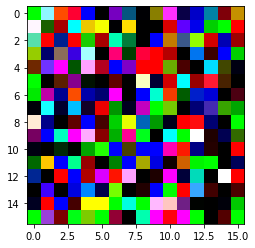

In [647]:
img=input[0][:,0:16,0:16]
img=img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


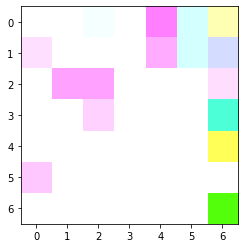

In [648]:
img=torch_out[0]
img=img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

In [649]:
def my_roi_pool(input=input, boxes=boxes, output_size=(7,7)):
    
    roi_start_h = int(boxes[0][1])
    roi_start_w = int(boxes[0][2])
    roi_end_h = int(boxes[0][3])
    roi_end_w = int(boxes[0][4])
    
    roi_width = (roi_end_w - roi_start_w + 1)
    roi_height = (roi_end_h - roi_start_h + 1)

    bin_size_w = roi_width / output_size[0]
    bin_size_h = roi_height / output_size[1]
    
    self_result = []
    for k in range(input.shape[1]):
        temp = []
        for j in range(output_size[0]):
            sub_res = []
            for i in range(output_size[1]):
                sub_res.append(input[..., int(0+bin_size_h*(j)):math.ceil(0+bin_size_h*(j+1)),
                                     int(0+bin_size_w*(i)):math.ceil(0+bin_size_w*(i+1))][0][k].max())
            temp.append(sub_res)
        self_result.append(temp)
    res = torch.Tensor(self_result)
    res = res.unsqueeze(0)
    return res

In [650]:
my_out = my_roi_pool()
my_out

tensor([[[[1.5790, 1.5790, 0.9646, 2.7889, 1.0140, 0.8330, 1.3395],
          [1.3331, 1.4697, 1.8569, 3.1269, 3.1269, 0.8330, 0.8330],
          [1.3331, 1.3331, 1.0179, 3.1269, 3.1269, 1.2269, 1.2269],
          [1.0935, 1.6951, 1.5574, 1.2923, 1.4861, 1.6620, 0.2996],
          [1.2782, 1.6951, 1.5574, 1.2923, 1.1095, 1.1375, 1.7267],
          [1.2782, 1.1079, 2.3415, 2.3415, 1.3814, 1.3814, 1.8755],
          [1.5475, 1.2200, 1.2856, 1.3032, 2.9455, 2.8276, 0.3285]],

         [[1.1295, 1.2357, 2.4697, 1.3948, 0.5005, 1.9451, 1.5043],
          [0.8747, 1.6279, 1.6279, 1.3948, 0.6708, 1.9451, 0.8700],
          [2.3587, 0.6379, 0.6379, 1.5011, 1.9798, 1.9798, 0.8700],
          [1.4683, 1.0179, 0.8217, 1.4460, 1.5852, 1.4715, 1.1953],
          [1.0179, 1.6843, 1.3646, 1.4460, 1.5852, 1.7468, 1.7468],
          [0.7805, 1.6843, 1.2857, 1.2857, 2.4759, 1.7468, 1.7468],
          [2.1762, 1.4452, 1.7019, 1.7015, 2.4759, 1.0590, 2.5660]],

         [[2.2613, 1.8689, 1.8689, 1.2769, 1

In [651]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# 2.4

In [415]:
mean = torch.Tensor(3,)
for i in range(3):
    mean[i] = input[0][i].mean()
mean

tensor([-0.0191, -0.0368, -0.0233])

In [416]:
var = torch.Tensor(3,)
for i in range(3):
    var[i] = input[0][i].var()
var

tensor([1.0328, 0.9971, 1.0094])

In [426]:
torch_out = torch.nn.functional.batch_norm(input, mean, var, weight=None, bias=None, training=False, momentum=0.1, eps=1e-05)
torch_out

tensor([[[[-0.3766,  0.5735,  1.5725,  ..., -1.4475,  0.9262,  2.0847],
          [ 1.2692,  0.1266,  0.6571,  ...,  0.5287,  0.8677,  0.6809],
          [ 0.3547,  1.0930, -0.4347,  ...,  1.2764,  0.1840, -0.0931],
          ...,
          [-0.0596, -0.4301, -0.9783,  ...,  0.7476, -0.9466,  0.9225],
          [ 1.7942, -0.8501,  1.1719,  ...,  1.6483,  1.4476,  0.8597],
          [ 0.6685,  1.2018, -1.6216,  ..., -0.3274, -0.8482, -0.5354]],

         [[ 1.1680,  1.0046,  0.3377,  ..., -1.1417,  0.7837,  0.0826],
          [ 1.0036,  0.4145, -0.2393,  ..., -1.2774, -1.6438,  0.3282],
          [ 0.9128, -0.5835,  0.1598,  ...,  0.6143,  1.1052,  0.7001],
          ...,
          [ 0.4275, -0.6680,  0.6898,  ...,  0.1746, -0.1167,  0.2368],
          [-0.5590, -0.3695,  0.6708,  ...,  0.5934, -0.1099,  0.1781],
          [-0.2277, -0.8610, -0.1733,  ...,  1.6653, -0.5360, -0.2459]],

         [[-0.8072,  2.2740, -0.3678,  ..., -0.3133, -0.2430, -0.0277],
          [ 1.0278, -1.0807, -

In [423]:
def my_batch_norm(input=input, running_mean=mean, running_var=var, momentum=0.1, eps=1e-05):
    mean = running_mean
    var = running_var
    mean, var = mean[:,None,None],var[:,None,None]
    
    return (input-mean) / torch.sqrt(var+eps)

In [425]:
my_out = my_batch_norm()
my_out

tensor([[[[-0.3766,  0.5735,  1.5725,  ..., -1.4475,  0.9262,  2.0847],
          [ 1.2692,  0.1266,  0.6571,  ...,  0.5287,  0.8677,  0.6809],
          [ 0.3547,  1.0930, -0.4347,  ...,  1.2764,  0.1840, -0.0931],
          ...,
          [-0.0596, -0.4301, -0.9783,  ...,  0.7476, -0.9466,  0.9225],
          [ 1.7942, -0.8501,  1.1719,  ...,  1.6483,  1.4476,  0.8597],
          [ 0.6685,  1.2018, -1.6216,  ..., -0.3274, -0.8482, -0.5354]],

         [[ 1.1680,  1.0046,  0.3377,  ..., -1.1417,  0.7837,  0.0826],
          [ 1.0036,  0.4145, -0.2393,  ..., -1.2774, -1.6438,  0.3282],
          [ 0.9128, -0.5835,  0.1598,  ...,  0.6143,  1.1052,  0.7001],
          ...,
          [ 0.4275, -0.6680,  0.6898,  ...,  0.1746, -0.1167,  0.2368],
          [-0.5590, -0.3695,  0.6708,  ...,  0.5934, -0.1099,  0.1781],
          [-0.2277, -0.8610, -0.1733,  ...,  1.6653, -0.5360, -0.2459]],

         [[-0.8072,  2.2740, -0.3678,  ..., -0.3133, -0.2430, -0.0277],
          [ 1.0278, -1.0807, -

In [428]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# 2.5

In [599]:
torch_out = torch.nn.functional.cross_entropy(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
torch_out

tensor(1.3738)

In [602]:
def softmax(x):
    res = torch.zeros(x.shape)
    for i in range(len(x)):
        exp = torch.exp(x[i])
        sum = torch.sum(exp, dim=0)
        softmax = exp/sum
        res[i] = -torch.log(softmax)
    return res
    
def nn_loss(input, target):
    loss_list = torch.zeros([len(input)])
    for k in range(len(input)):
        loss = 0
        for i in range(target.shape[1]):
            for j in range(target.shape[2]):
                index = target[k, i, j]
                num = input[k, index, i ,j]
                loss += num
        loss_list[k] = loss / target.shape[1] / target.shape[2]
    return loss_list

def cross_entropy(input, target):
    log_softmax = softmax(input)
    loss = nn_loss(log_softmax, target)
    return loss.mean()

In [603]:
my_out = cross_entropy(input, target)
my_out

tensor(1.3738)

In [564]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# 2.6

In [567]:
torch_out = torch.nn.functional.mse_loss(input, target, size_average=None, reduce=None, reduction='mean')
torch_out

<ipython-input-567-9627d67d2c07>:1: UserWarning: Using a target size (torch.Size([1, 32, 32])) that is different to the input size (torch.Size([1, 3, 32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch_out = torch.nn.functional.mse_loss(input, target, size_average=None, reduce=None, reduction='mean')


tensor(2.7353)

In [569]:
def mse_loss(input, target):
    square = (input - target)**2
    return square.mean()

In [570]:
my_out = mse_loss(input, target)
my_out

tensor(2.7353)

In [571]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


In [596]:
target[0].shape[1]

32